In [1308]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import tensorflow as tf

df = pd.read_csv("./Zakaria -TRAIN.csv")
df.head()

dft = pd.read_excel("./Test_Data.xlsx", index_col=0)
dft.head()


,gender,Management,USAcitizen,Married,MonthsInUnion,ContinuingEd,FeatureA,Connectivity,FeatureC,FeatureD,FeatureE,FeatureF,FeatureG,FeatureB,DuesFrequency,PaperlessBilling,PaymentMethod,MonthlyDues,TotalDues
DS_ID,,,,,,,,,,,,,,,,,,,
10000,Male,0,Yes,No,1,No,Maryville,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,30,30.0
10001,Female,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,57,1890.0
10002,Female,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,54,108.0
10003,Female,0,No,No,45,No,Maryville,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42,1841.0
10004,Male,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,71,152.0


In [1309]:
col = list(np.arange(1,len(df.columns) - 1))
col

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [1310]:
df = pd.read_csv("./Zakaria -TRAIN.csv", usecols=col)
df.head()

,gender,Management,USAcitizen,Married,MonthsInUnion,ContinuingEd,FeatureA,Connectivity,FeatureC,FeatureD,FeatureE,FeatureF,FeatureG,FeatureB,DuesFrequency,PaperlessBilling,PaymentMethod,MonthlyDues,TotalDues
0,Male,0,No,No,26,Yes,No,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,86,2147
1,Female,0,Yes,No,34,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,100,3415
2,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70,70
3,Male,1,Yes,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Mailed check,71,71
4,Male,1,Yes,No,62,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Electronic check,104,6383


In [1311]:
target = pd.read_csv("./Zakaria -TRAIN.csv", usecols=["LeftUnion"])
target.head()

,LeftUnion
0,No
1,No
2,No
3,Yes
4,Yes


# Doing Train and Test Split

In [1312]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.33, random_state=42, shuffle = True)

In [1313]:
# reseting the index

X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
test_set = dft.reset_index(drop=True)

X_train.head()

,gender,Management,USAcitizen,Married,MonthsInUnion,ContinuingEd,FeatureA,Connectivity,FeatureC,FeatureD,FeatureE,FeatureF,FeatureG,FeatureB,DuesFrequency,PaperlessBilling,PaymentMethod,MonthlyDues,TotalDues
0,Male,0,Yes,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Mailed check,70,144
1,Female,0,No,No,16,Yes,No,DSL,No,Yes,No,Yes,No,No,Month-to-month,Yes,Mailed check,54,834
2,Male,1,No,No,7,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Mailed check,74,545
3,Male,0,No,No,26,Yes,No,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,86,2147
4,Male,0,No,No,2,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,45,75


In [1314]:
y_train.head()

,LeftUnion
0,No
1,Yes
2,Yes
3,No
4,Yes


In [1315]:
def merge_data_label(df1, df2):
    data = pd.concat([df1, df2], axis = 1)
    return data

data = merge_data_label(X_train, y_train)
data_test = merge_data_label(X_test, y_test)

In [1316]:
df = data
df.head()

,gender,Management,USAcitizen,Married,MonthsInUnion,ContinuingEd,FeatureA,Connectivity,FeatureC,FeatureD,FeatureE,FeatureF,FeatureG,FeatureB,DuesFrequency,PaperlessBilling,PaymentMethod,MonthlyDues,TotalDues,LeftUnion
0,Male,0,Yes,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Mailed check,70,144,No
1,Female,0,No,No,16,Yes,No,DSL,No,Yes,No,Yes,No,No,Month-to-month,Yes,Mailed check,54,834,Yes
2,Male,1,No,No,7,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Mailed check,74,545,Yes
3,Male,0,No,No,26,Yes,No,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,86,2147,No
4,Male,0,No,No,2,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,45,75,Yes


In [1317]:
# check Nan values in the dataframe

def check_nan(df):
    return df.isna().sum(axis = 0)

# df.isna().sum(axis = 0)   # Nan values in every column
# df.isna().sum(axis = 1)   # Nan values in every row.

In [1318]:
print(check_nan(df))
print()
print(check_nan(data_test))
print()
print(check_nan(test_set))

gender              0
Management          0
USAcitizen          0
Married             0
MonthsInUnion       0
ContinuingEd        0
FeatureA            0
Connectivity        0
FeatureC            0
FeatureD            0
FeatureE            0
FeatureF            0
FeatureG            0
FeatureB            0
DuesFrequency       0
PaperlessBilling    0
PaymentMethod       0
MonthlyDues         0
TotalDues           0
LeftUnion           0
dtype: int64

gender              0
Management          0
USAcitizen          0
Married             0
MonthsInUnion       0
ContinuingEd        0
FeatureA            0
Connectivity        0
FeatureC            0
FeatureD            0
FeatureE            0
FeatureF            0
FeatureG            0
FeatureB            0
DuesFrequency       0
PaperlessBilling    0
PaymentMethod       0
MonthlyDues         0
TotalDues           0
LeftUnion           0
dtype: int64

gender              0
Management          0
USAcitizen          0
Married             0
Mont

In [1319]:
# Checking dataset columns
def count_unique(df_col):
    return df_col.value_counts()

print(count_unique(df["USAcitizen"]))
# df["USAcitizen"].value_counts()

Yes    338
No     331
Name: USAcitizen, dtype: int64


In [1320]:
# Binary unique values

print(count_unique(df["Married"]))
print(count_unique(df["ContinuingEd"]))
print(count_unique(df["PaperlessBilling"]))


No     464
Yes    205
Name: Married, dtype: int64
Yes    602
No      67
Name: ContinuingEd, dtype: int64
Yes    379
No     290
Name: PaperlessBilling, dtype: int64


In [1321]:
# Transforming categorical data into numeric data

from sklearn.preprocessing import LabelEncoder

def encode(x):
    x = LabelEncoder().fit_transform(x)
    return x

df[['gender', 'USAcitizen', 'Married', 'ContinuingEd', 'PaperlessBilling']] = df[['gender', 'USAcitizen', 'Married', \
                    'ContinuingEd', 'PaperlessBilling']].apply(encode)

data_test[['gender', 'USAcitizen', 'Married', 'ContinuingEd', 'PaperlessBilling']] = data_test[['gender', 'USAcitizen', 'Married', \
                    'ContinuingEd', 'PaperlessBilling']].apply(encode)

test_set[['gender', 'USAcitizen', 'Married', 'ContinuingEd', 'PaperlessBilling']] = test_set[['gender', 'USAcitizen', 'Married', \
                    'ContinuingEd', 'PaperlessBilling']].apply(encode)

In [1322]:
df.head()

,gender,Management,USAcitizen,Married,MonthsInUnion,ContinuingEd,FeatureA,Connectivity,FeatureC,FeatureD,FeatureE,FeatureF,FeatureG,FeatureB,DuesFrequency,PaperlessBilling,PaymentMethod,MonthlyDues,TotalDues,LeftUnion
0,1,0,1,1,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,0,Mailed check,70,144,No
1,0,0,0,0,16,1,No,DSL,No,Yes,No,Yes,No,No,Month-to-month,1,Mailed check,54,834,Yes
2,1,1,0,0,7,1,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,0,Mailed check,74,545,Yes
3,1,0,0,0,26,1,No,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,1,Electronic check,86,2147,No
4,1,0,0,0,2,1,No,DSL,No,No,No,No,No,No,Month-to-month,0,Mailed check,45,75,Yes


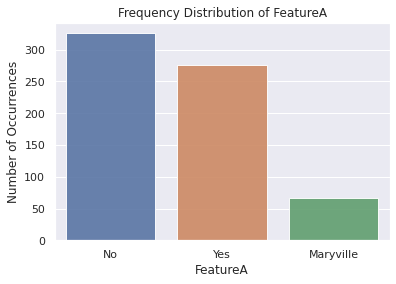

In [1323]:
# Plotting and check FeatureA
# Histogram

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

carrier_count = df['FeatureA'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of FeatureA')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('FeatureA', fontsize=12)

plt.show()

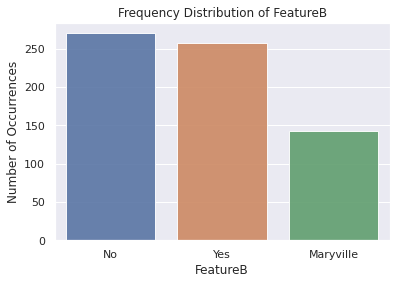

In [1324]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

carrier_count = df['FeatureB'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of FeatureB')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('FeatureB', fontsize=12)

plt.show()

In [1325]:
# Non binary unique values

print(df["FeatureA"].value_counts())
print(df["FeatureB"].value_counts())
print(df["FeatureC"].value_counts())
print(df["FeatureD"].value_counts())
print(df["FeatureE"].value_counts())
print(df["FeatureF"].value_counts())
print(df["FeatureG"].value_counts())
print(df["Connectivity"].value_counts())
print(df["DuesFrequency"].value_counts())
print(df["PaymentMethod"].value_counts())

No           326
Yes          276
Maryville     67
Name: FeatureA, dtype: int64
No           270
Yes          257
Maryville    142
Name: FeatureB, dtype: int64
No           308
Yes          219
Maryville    142
Name: FeatureC, dtype: int64
No           290
Yes          237
Maryville    142
Name: FeatureD, dtype: int64
No           285
Yes          242
Maryville    142
Name: FeatureE, dtype: int64
No           336
Yes          191
Maryville    142
Name: FeatureF, dtype: int64
Yes          274
No           253
Maryville    142
Name: FeatureG, dtype: int64
Fiber optic    300
DSL            227
other           92
Dial-in         50
Name: Connectivity, dtype: int64
Month-to-month    355
Two year          160
One year          154
Name: DuesFrequency, dtype: int64
Electronic check             231
Mailed check                 157
Credit card (automatic)      145
Bank transfer (automatic)    136
Name: PaymentMethod, dtype: int64


In [1326]:
# One Hot Encoding non binary values

def encode_nb(x, col, pre = "feature"):
    x = pd.get_dummies(x, columns = [col], prefix=pre)
    return x

# df3 = pd.get_dummies(df, columns= ['FeatureA', 'FeatureB', 'FeatureC', 'FeatureD', 'FeatureE', 'FeatureF','FeatureG'], prefix='feature')
df3 = encode_nb(df, 'FeatureA', "A")
df3 = encode_nb(df3, 'FeatureB', "B")
df3 = encode_nb(df3, 'FeatureC', "C")
df3 = encode_nb(df3, 'FeatureD', "D")
df3 = encode_nb(df3, 'FeatureE', "E")
df3 = encode_nb(df3, 'FeatureF', "F")
df3 = encode_nb(df3, 'FeatureG', "G")
df3 = encode_nb(df3, 'Connectivity', "conn")
df3 = encode_nb(df3, 'DuesFrequency', "dues_F")
df3 = encode_nb(df3, 'PaymentMethod', "pay_M")

# For test data

df_test = encode_nb(data_test, 'FeatureA', "A")
df_test = encode_nb(df_test, 'FeatureB', "B")
df_test = encode_nb(df_test, 'FeatureC', "C")
df_test = encode_nb(df_test, 'FeatureD', "D")
df_test = encode_nb(df_test, 'FeatureE', "E")
df_test = encode_nb(df_test, 'FeatureF', "F")
df_test = encode_nb(df_test, 'FeatureG', "G")
df_test = encode_nb(df_test, 'Connectivity', "conn")
df_test = encode_nb(df_test, 'DuesFrequency', "dues_F")
df_test = encode_nb(df_test, 'PaymentMethod', "pay_M")

# For New test data

test_set = encode_nb(test_set, 'FeatureA', "A")
test_set = encode_nb(test_set, 'FeatureB', "B")
test_set = encode_nb(test_set, 'FeatureC', "C")
test_set = encode_nb(test_set, 'FeatureD', "D")
test_set = encode_nb(test_set, 'FeatureE', "E")
test_set = encode_nb(test_set, 'FeatureF', "F")
test_set = encode_nb(test_set, 'FeatureG', "G")
test_set = encode_nb(test_set, 'Connectivity', "conn")
test_set = encode_nb(test_set, 'DuesFrequency', "dues_F")
test_set = encode_nb(test_set, 'PaymentMethod', "pay_M")

In [1329]:
df3.head()

,gender,Management,USAcitizen,Married,MonthsInUnion,ContinuingEd,PaperlessBilling,MonthlyDues,TotalDues,LeftUnion,...,conn_Dial-in,conn_Fiber optic,conn_other,dues_F_Month-to-month,dues_F_One year,dues_F_Two year,pay_M_Bank transfer (automatic),pay_M_Credit card (automatic),pay_M_Electronic check,pay_M_Mailed check
0,1,0,1,1,2,1,0,70,144,No,...,0,1,0,1,0,0,0,0,0,1
1,0,0,0,0,16,1,1,54,834,Yes,...,0,0,0,1,0,0,0,0,0,1
2,1,1,0,0,7,1,0,74,545,Yes,...,0,1,0,1,0,0,0,0,0,1
3,1,0,0,0,26,1,1,86,2147,No,...,0,1,0,1,0,0,0,0,1,0
4,1,0,0,0,2,1,0,45,75,Yes,...,0,0,0,1,0,0,0,0,0,1


## Check Nan values in every column

In [1180]:
# df3.isna().sum(axis = 0)   # Nan values in every column
# df_test.isna().sum(axis = 0)   # Nan values in every column

# df.isna().sum(axis = 1)   # Nan values in every row.

gender                             0
Management                         0
USAcitizen                         0
Married                            0
MonthsInUnion                      0
ContinuingEd                       0
PaperlessBilling                   0
MonthlyDues                        0
TotalDues                          0
LeftUnion                          0
A_Maryville                        0
A_No                               0
A_Yes                              0
B_Maryville                        0
B_No                               0
B_Yes                              0
C_Maryville                        0
C_No                               0
C_Yes                              0
D_Maryville                        0
D_No                               0
D_Yes                              0
E_Maryville                        0
E_No                               0
E_Yes                              0
F_Maryville                        0
F_No                               0
F

In [1124]:
# Checking type

# df.dtypes

## Plotting and Visualization

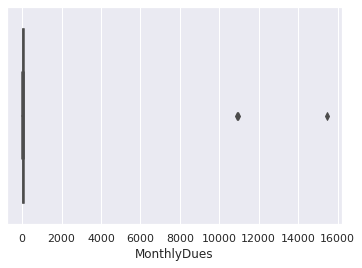

In [1330]:
# detecting outlier

import seaborn as sns
sns.boxplot(x=df3['MonthlyDues'])

In [1331]:
df3['MonthlyDues'].unique()   # certainly there are outliers

array([   70,    54,    74,    86,    45,    90,    25,    20,    75,
          94,    60,    79,   111,   100,    69,    85,    76,   104,
         103,    71,    46,    84,   114,    78,   110,   106,    89,
          95,    81,    97,    44,    55,    80,   115,    91,    50,
         109,   108,   112,    67,    56,    53,    24,    64,    99,
          77,    29,    31,   116,   101,    88,    72,    19,    83,
          36,    30,    92,    93,    41,   105,    82,    66,    49,
          26,    21,    58,    98,    51,    68,    96,    34,   113,
          73,   102, 10878,   107,    48,    40, 15453,    61,    65,
          87,    35,    18,    62, 10938,    57,   119,    42])

In [1332]:
df3['TotalDues'].unique()

array(['144', '834', '545', '2147', '75', '145', '248', '25', '952',
       '1129', '1608', '3036', '171', '5565', '70', '7512', '5201', '69',
       '1350', '152', '3467', '4108', '20', '5538', '1975', '1993', '46',
       '5982', '7939', '2840', '68', '855', '1832', '7535', '3650',
       '4513', '2258', '7041', '4614', '3106', '400', '303', '5879',
       '143', '2684', '52', '2018', '573', '563', '2861', '5657', '457',
       '93', '4246', '2614', '4307', '605', '320', '271', '7334', '169',
       '311', '2920', '267', '6938', '470', '7931', '4915', '369', '7796',
       '832', '5000', '2387', '202', '1150', '1208', '1733', '863',
       '1391', '5648', '906', '6442', '3369', '1464', '2708', '2866',
       '8004', '1204', '302', '73', '3632', '196', '3777', '1759', '265',
       '227', '926', '7159', '8425', '4113', '220', '6521', '3173', '19',
       '5213', '1799', '831', '#VALUE!', '261', '2296', '2352', '244',
       '6414', '1169', '476', '7509', '1929', '4698', '1648', '1009'

In [1333]:
# Converting TotalDues column from strings to integers/float

df3['TotalDues'] = pd.to_numeric(df3.TotalDues, errors="coerce")

# For test set
df_test['TotalDues'] = pd.to_numeric(df_test.TotalDues, errors="coerce")

In [1334]:
print(df3['TotalDues'])
print()
print(df_test['TotalDues'])

0       144.0
1       834.0
2       545.0
3      2147.0
4        75.0
        ...  
664     292.0
665    6585.0
666      74.0
667    1327.0
668     392.0
Name: TotalDues, Length: 669, dtype: float64

0      1110
1      2551
2        78
3      5594
4       140
       ... 
325    4495
326    4534
327     443
328      44
329    6474
Name: TotalDues, Length: 330, dtype: int64


In [1339]:
#  checking nan for training set
print(df3["TotalDues"].isna().sum(axis = 0) )

# checking nan for test set
print(df_test["TotalDues"].isna().sum(axis = 0) )
print(test_set["TotalDues"].isna().sum(axis = 0) )

0
0
0


In [1187]:
# Finding the row which contains Nan value

is_NaN = df3.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df3[row_has_NaN]
rows_with_NaN.head()

# print(rows_with_NaN)


,gender,Management,USAcitizen,Married,MonthsInUnion,ContinuingEd,PaperlessBilling,MonthlyDues,TotalDues,LeftUnion,...,conn_Dial-in,conn_Fiber optic,conn_other,dues_F_Month-to-month,dues_F_One year,dues_F_Two year,pay_M_Bank transfer (automatic),pay_M_Credit card (automatic),pay_M_Electronic check,pay_M_Mailed check
112,1,0,1,1,0,1,0,20,NaN,No,...,1,0,0,0,0,1,0,0,0,1


In [1338]:
# Filling Nan value

# df3.apply(lambda x: x.fillna(x.mean()),axis=0)
df3['TotalDues'] = round(df3['TotalDues'].fillna((df3['TotalDues'].mean())),0)
test_set['TotalDues'] = round(test_set['TotalDues'].fillna((test_set['TotalDues'].mean())),0)


In [1340]:
# Checking Nan values again

df3["TotalDues"].isna().sum(axis = 0) 

0

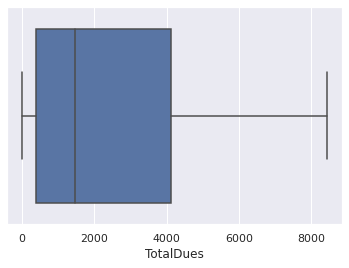

In [1341]:
sns.boxplot(x=df3['TotalDues'])

# As you can see there is no outlier in this data

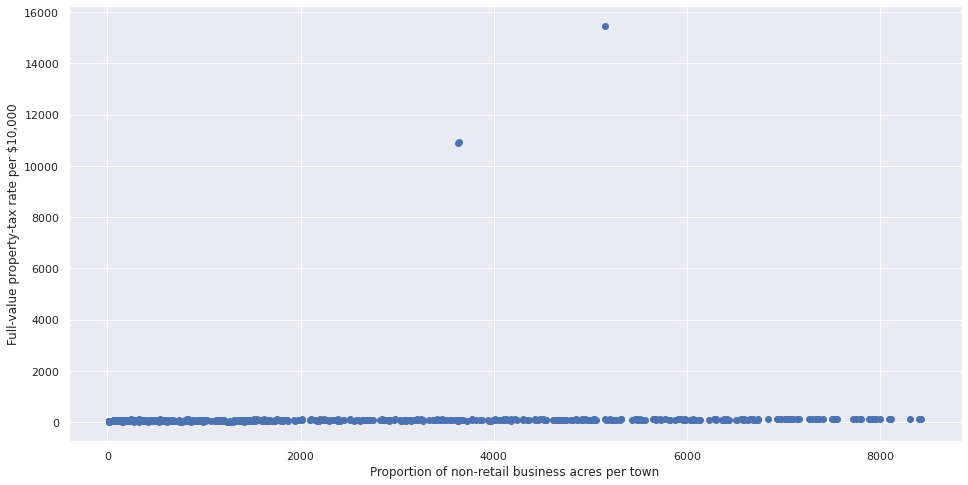

In [1342]:
# Scatter plot for detecting outlier
# tHis shows that in the monthlydues there is an outlier

fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df3['TotalDues'], df3['MonthlyDues'])
ax.set_xlabel('Proportion of non-retail business acres per town')
ax.set_ylabel('Full-value property-tax rate per $10,000')
plt.show()

In [1343]:
# Removing Outlier

from scipy import stats
import numpy as np

#### compute percentile then filter the value
# max_value = df['MonthlyDues'].quantile(0.995)
# print(max)

#df[df.MonthlyDues > max_value]

# OR

# you can filter by just simply plotting and analyzing.
df2 = df3[df3['MonthlyDues'] < 1000]

In [1344]:
df2.head()

,gender,Management,USAcitizen,Married,MonthsInUnion,ContinuingEd,PaperlessBilling,MonthlyDues,TotalDues,LeftUnion,...,conn_Dial-in,conn_Fiber optic,conn_other,dues_F_Month-to-month,dues_F_One year,dues_F_Two year,pay_M_Bank transfer (automatic),pay_M_Credit card (automatic),pay_M_Electronic check,pay_M_Mailed check
0,1,0,1,1,2,1,0,70,144.0,No,...,0,1,0,1,0,0,0,0,0,1
1,0,0,0,0,16,1,1,54,834.0,Yes,...,0,0,0,1,0,0,0,0,0,1
2,1,1,0,0,7,1,0,74,545.0,Yes,...,0,1,0,1,0,0,0,0,0,1
3,1,0,0,0,26,1,1,86,2147.0,No,...,0,1,0,1,0,0,0,0,1,0
4,1,0,0,0,2,1,0,45,75.0,Yes,...,0,0,0,1,0,0,0,0,0,1


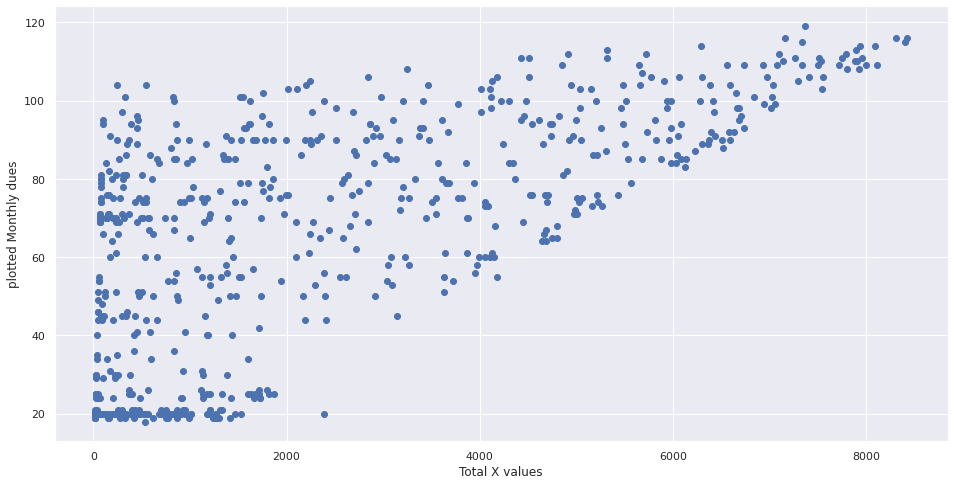

In [1345]:
# Again testing outlier
 
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df2['TotalDues'], df2['MonthlyDues'])
ax.set_xlabel('Total X values')
ax.set_ylabel('plotted Monthly dues')
plt.show()

{'bodies': [<matplotlib.collections.PolyCollection at 0x7fce85f4e340>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x7fce85f4e190>,
 'cmins': <matplotlib.collections.LineCollection at 0x7fce85f4e1c0>,
 'cbars': <matplotlib.collections.LineCollection at 0x7fce85f4e760>}

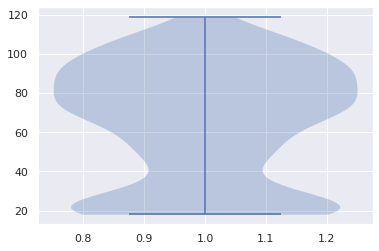

In [1346]:
# plotting violin plot

plt.violinplot(df2['MonthlyDues'])

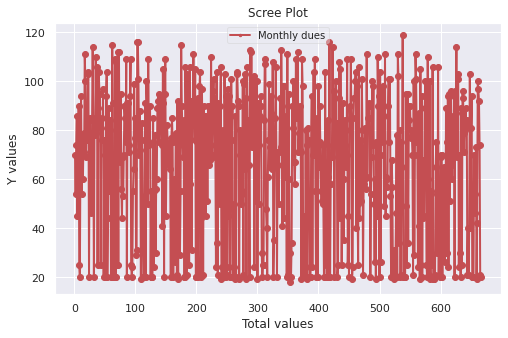

In [1347]:
# Plotting Scree plot
import matplotlib

mon_dues = df2['MonthlyDues']
# yearly_dues = df2["TotalDues"]

fig = plt.figure(figsize=(8,5))
sing_vals = np.arange(len(df2['MonthlyDues'])) + 1
plt.plot(sing_vals, mon_dues, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Total values')
plt.ylabel('Y values')
#I don't like the default legend so I typically make mine like below, e.g.
#with smaller fonts and a bit transparent so I do not cover up data, and make
#it moveable by the viewer in case upper-right is a bad place for it 
leg = plt.legend(['Monthly dues'], loc='best', borderpad=0.3, 
                 shadow=False, prop=matplotlib.font_manager.FontProperties(size='small'),
                 markerscale=0.4)
leg.get_frame().set_alpha(0.4)
# leg.draggable(state=True)
plt.show()


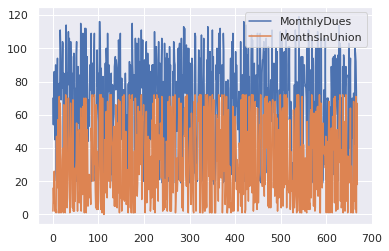

In [1348]:
#### Plotting bivariate plot 

df4 = df2[['MonthlyDues', 'MonthsInUnion']]

df4.plot.line()

## Normalizing the dataset.

In [1349]:
# For training Set

df2["MonthsInUnion"] = df2["MonthsInUnion"] / df2["MonthsInUnion"].max(axis=0)
df2["MonthlyDues"] = df2["MonthlyDues"] / df2["MonthlyDues"].max(axis=0)
df2["TotalDues"] = df2["TotalDues"] / df2["TotalDues"].max(axis=0)
# df2.head()

# For test data

df_test["MonthsInUnion"] = df_test["MonthsInUnion"] / df_test["MonthsInUnion"].max(axis=0)
df_test["MonthlyDues"] = df_test["MonthlyDues"] / df_test["MonthlyDues"].max(axis=0)
df_test["TotalDues"] = df_test["TotalDues"] / df_test["TotalDues"].max(axis=0)
# df_test.head()

# For New Test set

test_set["MonthsInUnion"] = test_set["MonthsInUnion"] / test_set["MonthsInUnion"].max(axis=0)
test_set["MonthlyDues"] = test_set["MonthlyDues"] / test_set["MonthlyDues"].max(axis=0)
test_set["TotalDues"] = test_set["TotalDues"] / test_set["TotalDues"].max(axis=0)
test_set.head()


<ipython-input-1349-ad99f2dc0fa0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["MonthsInUnion"] = df2["MonthsInUnion"] / df2["MonthsInUnion"].max(axis=0)
<ipython-input-1349-ad99f2dc0fa0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["MonthlyDues"] = df2["MonthlyDues"] / df2["MonthlyDues"].max(axis=0)
<ipython-input-1349-ad99f2dc0fa0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

,gender,Management,USAcitizen,Married,MonthsInUnion,ContinuingEd,PaperlessBilling,MonthlyDues,TotalDues,A_Maryville,...,conn_Dial-in,conn_Fiber optic,conn_other,dues_F_Month-to-month,dues_F_One year,dues_F_Two year,pay_M_Bank transfer (automatic),pay_M_Credit card (automatic),pay_M_Electronic check,pay_M_Mailed check
0,1,0,1,0,0.013889,0,1,0.252101,0.003454,1,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.472222,1,0,0.478992,0.217617,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.027778,1,1,0.453782,0.012435,0,...,0,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.625000,0,0,0.352941,0.211975,1,...,0,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.027778,1,1,0.596639,0.017501,0,...,0,1,0,1,0,0,0,0,1,0


In [1361]:
# FOr trainng set
X_train = df2.drop(['LeftUnion'], axis=1)
# X_train.head()

# FOr test set
X_test = df_test.drop(['LeftUnion'], axis=1)

X_test.head()

,gender,Management,USAcitizen,Married,MonthsInUnion,ContinuingEd,PaperlessBilling,MonthlyDues,TotalDues,A_Maryville,...,conn_Dial-in,conn_Fiber optic,conn_other,dues_F_Month-to-month,dues_F_One year,dues_F_Two year,pay_M_Bank transfer (automatic),pay_M_Credit card (automatic),pay_M_Electronic check,pay_M_Mailed check
0,1,0,1,0,0.736111,1,0,0.168067,0.127998,0,...,1,0,0,0,0,1,0,1,0,0
1,1,1,0,0,0.722222,0,1,0.411765,0.294165,1,...,0,0,0,1,0,0,0,0,1,0
2,0,1,0,0,0.013889,1,0,0.655462,0.008994,0,...,0,1,0,1,0,0,0,0,1,0
3,1,1,0,0,0.777778,1,1,0.848739,0.645065,0,...,0,1,0,1,0,0,0,0,1,0
4,0,0,0,0,0.041667,1,1,0.453782,0.016144,0,...,0,0,0,1,0,0,0,0,1,0


In [1360]:
# For training
y_train = df2["LeftUnion"]
y_train = y_train.to_frame()  # convert series to df.
# y_train.head()

# FOr testing
y_test = df_test["LeftUnion"]
y_test = y_test.to_frame()  # convert series to df.
y_test.head()


,LeftUnion
0,0
1,1
2,1
3,0
4,0


In [1353]:
# For training
# Encoding target values
# Encoding target values into 1 and 0.
y_train = y_train.apply(encode)
# y_train.head()

# For testing
y_test = y_test.apply(encode)
y_test.head()

,LeftUnion
0,0
1,1
2,1
3,0
4,0


# Fitting models

## *Regression Model*

In [1368]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.linear_model import LogisticRegression

# reg = LinearRegression().fit(X_train.values, y_train.values)
reg = LogisticRegression().fit(X_train.values, y_train.values)


/home/furqan/Desktop/python_work/tensorflow_env/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [1369]:
y_pred = reg.predict(X_test)
print(y_pred)

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 1 1 1
 1 1 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 1 1 0 0 0 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 1 1 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [1370]:
#printing the results 
print ('Confusion Matrix :') 
print(confusion_matrix(y_test, y_pred)) 
print ('Accuracy Score :',accuracy_score(y_test, y_pred)) 
print ('Report : ') 
print (classification_report(y_test, y_pred))

Confusion Matrix :
[[208  33]
 [ 37  52]]
Accuracy Score : 0.7878787878787878
Report : 
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       241
           1       0.61      0.58      0.60        89

    accuracy                           0.79       330
   macro avg       0.73      0.72      0.73       330
weighted avg       0.79      0.79      0.79       330



#### Testing with new dataset

In [1371]:
pred = reg.predict(test_set[0:100])
print(pred)

[0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1]


# Decision Tree

In [1218]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [1219]:
#printing the results 
print ('Confusion Matrix :') 
print(confusion_matrix(y_test, y_pred)) 
print ('Accuracy Score :',accuracy_score(y_test, y_pred)) 
print ('Report : ') 
print (classification_report(y_test, y_pred))

Confusion Matrix :
[[192  49]
 [ 49  40]]
Accuracy Score : 0.703030303030303
Report : 
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       241
           1       0.45      0.45      0.45        89

    accuracy                           0.70       330
   macro avg       0.62      0.62      0.62       330
weighted avg       0.70      0.70      0.70       330



# Support Vector Machine

In [1220]:
from sklearn import svm

clf = svm.SVC()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

/home/furqan/Desktop/python_work/tensorflow_env/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [1221]:
#printing the results 
print ('Confusion Matrix :') 
print(confusion_matrix(y_test, y_pred)) 
print ('Accuracy Score :',accuracy_score(y_test, y_pred)) 
print ('Report : ') 
print (classification_report(y_test, y_pred))

Confusion Matrix :
[[215  26]
 [ 55  34]]
Accuracy Score : 0.7545454545454545
Report : 
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       241
           1       0.57      0.38      0.46        89

    accuracy                           0.75       330
   macro avg       0.68      0.64      0.65       330
weighted avg       0.73      0.75      0.74       330



# Random Forest

In [1246]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=5, n_estimators= 100 , random_state=25)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

<ipython-input-1246-a0151344932e>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf = clf.fit(X_train, y_train)


In [1247]:
#printing the results 
print ('Confusion Matrix :') 
print(confusion_matrix(y_test, y_pred)) 
print ('Accuracy Score :',accuracy_score(y_test, y_pred)) 
print ('Report : ') 
print (classification_report(y_test, y_pred))

Confusion Matrix :
[[215  26]
 [ 44  45]]
Accuracy Score : 0.7878787878787878
Report : 
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       241
           1       0.63      0.51      0.56        89

    accuracy                           0.79       330
   macro avg       0.73      0.70      0.71       330
weighted avg       0.78      0.79      0.78       330



# Neural Network

In [1251]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(12, input_dim=41, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 12)                504       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 617
Trainable params: 617
Non-trainable params: 0
_________________________________________________________________


In [1252]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
67/67 [==============================] - 0s 2ms/step - loss: 0.5866 - accuracy: 0.7282
Epoch 2/150
67/67 [==============================] - 0s 2ms/step - loss: 0.5122 - accuracy: 0.7357
Epoch 3/150
67/67 [==============================] - 0s 1ms/step - loss: 0.4760 - accuracy: 0.7357
Epoch 4/150
67/67 [==============================] - 0s 2ms/step - loss: 0.4588 - accuracy: 0.7357
Epoch 5/150
67/67 [==============================] - 0s 1ms/step - loss: 0.4486 - accuracy: 0.7357
Epoch 6/150
67/67 [==============================] - 0s 1ms/step - loss: 0.4422 - accuracy: 0.7447
Epoch 7/150
67/67 [==============================] - 0s 1ms/step - loss: 0.4379 - accuracy: 0.7718
Epoch 8/150
67/67 [==============================] - 0s 1ms/step - loss: 0.4333 - accuracy: 0.7853
Epoch 9/150
67/67 [==============================] - 0s 2ms/step - loss: 0.4302 - accuracy: 0.7943
Epoch 10/150
67/67 [==============================] - 0s 1ms/step - loss: 0.4259 - accuracy: 0.7973
Epoch 11/

67/67 [==============================] - 0s 2ms/step - loss: 0.2828 - accuracy: 0.8649
Epoch 84/150
67/67 [==============================] - 0s 1ms/step - loss: 0.2818 - accuracy: 0.8649
Epoch 85/150
67/67 [==============================] - 0s 1ms/step - loss: 0.2790 - accuracy: 0.8694
Epoch 86/150
67/67 [==============================] - 0s 1ms/step - loss: 0.2812 - accuracy: 0.8694
Epoch 87/150
67/67 [==============================] - 0s 1ms/step - loss: 0.2764 - accuracy: 0.8739
Epoch 88/150
67/67 [==============================] - 0s 1ms/step - loss: 0.2757 - accuracy: 0.8874
Epoch 89/150
67/67 [==============================] - 0s 1ms/step - loss: 0.2731 - accuracy: 0.8754
Epoch 90/150
67/67 [==============================] - 0s 1ms/step - loss: 0.2711 - accuracy: 0.8799
Epoch 91/150
67/67 [==============================] - 0s 1ms/step - loss: 0.2698 - accuracy: 0.8799
Epoch 92/150
67/67 [==============================] - 0s 2ms/step - loss: 0.2698 - accuracy: 0.8754
Epoch 93/150


In [1254]:

...
# evaluate the keras model
_, accuracy = model.evaluate(X_train, y_train)
print('Training Accuracy: %.2f' % (accuracy*100))
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test)
print('Testing Accuracy: %.2f' % (accuracy*100))

21/21 [==============================] - 0s 1ms/step - loss: 0.1886 - accuracy: 0.9144
Training Accuracy: 91.44
11/11 [==============================] - 0s 1ms/step - loss: 0.8607 - accuracy: 0.6758
Testing Accuracy: 67.58


In [1263]:
# y_pred = model.predict(X_test)
y_pred = model.predict_classes(X_test)

In [1264]:
#printing the results 
print ('Confusion Matrix :') 
print(confusion_matrix(y_test, y_pred)) 
print ('Accuracy Score :',accuracy_score(y_test, y_pred)) 
print ('Report : ') 
print (classification_report(y_test, y_pred))

Confusion Matrix :
[[185  56]
 [ 51  38]]
Accuracy Score : 0.6757575757575758
Report : 
              precision    recall  f1-score   support

           0       0.78      0.77      0.78       241
           1       0.40      0.43      0.42        89

    accuracy                           0.68       330
   macro avg       0.59      0.60      0.60       330
weighted avg       0.68      0.68      0.68       330



# Q / A

Q1 : Comparing your results, to that of a blind guess, explain why you think the results differed?

ANS: In the blind guesses the model is not trained on any kind of data. you just give a random prediction
    There is no statistical calculation involved behind the ans. therefore the results differ after training the
    model
    
Q2 : Describe how you would improve your project if you had more time?
    
ANS: I would apply some advance statistical technique for removing outliers and assigning more weights to the 
    minority class. 